# Rishiraj Sutar
## Question 2) Create a timeline summarization plot.

In [643]:
import json
import pandas as pd

file_path = 'news.article.json'

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)

In [603]:
# Display the first few rows of the DataFrame
print(df.head())

         date central_title
0  2024-06-01       Event A
1  2024-06-02       Event B
2  2024-06-03       Event C
3  2024-06-04       Event D
4  2024-06-05       Event E


In [22]:
new_df = df[['dateModified' , 'title']]

In [28]:
new_df.dropna()

,dateModified,title,date_column
0,{'$date': '2023-10-25T06:35:50.000Z'},Shiv Sena MP Sanjay Raut Responds To 'Hamas' R...,2023-10-25 06:35:50+00:00
2,{'$date': '2023-10-25T02:14:27.000Z'},Uddhav buried Bal Thackeray's 'Hindutva' for p...,2023-10-25 02:14:27+00:00
4,{'$date': '2023-10-26T14:45:24.000Z'},"Israel biggest terrorist nation in the world, ...",2023-10-26 14:45:24+00:00
5,{'$date': '2023-10-26T11:22:00.000Z'},Eight Ex-Indian Navy Officers Get Death Penalt...,2023-10-26 11:22:00+00:00
6,{'$date': '2023-10-26T13:51:52.000Z'},Israel’s response to Hamas terrorist attack di...,2023-10-26 13:51:52+00:00
...,...,...,...
37415,{'$date': '2024-03-23T23:39:21.000Z'},Israeli airstrike in northeastern Lebanon woun...,2024-03-23 23:39:21+00:00
37417,{'$date': '2024-03-31T03:03:52.000Z'},"US approves additional bombs, warplanes sales ...",2024-03-31 03:03:52+00:00
37418,{'$date': '2024-03-28T00:00:00.000Z'},Israel Publishes Video of Islamic Jihad Terror...,2024-03-28 00:00:00+00:00
37419,{'$date': '2024-03-31T00:00:00.000Z'},United Nations secretary general condemns expl...,2024-03-31 00:00:00+00:00


In [24]:
def extract_and_convert_date(date_dict):
    if isinstance(date_dict, dict) and '$date' in date_dict:
        date_str = date_dict['$date']
        return pd.to_datetime(date_str)
    return None  # or pd.NaT if you want to return a pandas NaT for missing/invalid entries
new_df['date_column'] = new_df['dateModified'].apply(extract_and_convert_date)

C:\Users\hp\AppData\Local\Temp\ipykernel_10420\2249624973.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date_column'] = new_df['dateModified'].apply(extract_and_convert_date)


In [32]:
new_df1 = new_df.dropna()

In [33]:
new_df1.drop('dateModified' , axis = 1)

,title,date_column
0,Shiv Sena MP Sanjay Raut Responds To 'Hamas' R...,2023-10-25 06:35:50+00:00
2,Uddhav buried Bal Thackeray's 'Hindutva' for p...,2023-10-25 02:14:27+00:00
4,"Israel biggest terrorist nation in the world, ...",2023-10-26 14:45:24+00:00
5,Eight Ex-Indian Navy Officers Get Death Penalt...,2023-10-26 11:22:00+00:00
6,Israel’s response to Hamas terrorist attack di...,2023-10-26 13:51:52+00:00
...,...,...
37415,Israeli airstrike in northeastern Lebanon woun...,2024-03-23 23:39:21+00:00
37417,"US approves additional bombs, warplanes sales ...",2024-03-31 03:03:52+00:00
37418,Israel Publishes Video of Islamic Jihad Terror...,2024-03-28 00:00:00+00:00
37419,United Nations secretary general condemns expl...,2024-03-31 00:00:00+00:00


## Data Pre-processing

In [20]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [34]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

# Define a function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to the 'title' column
new_df1['processed_title'] = new_df1['title'].apply(preprocess_text)

# Display the dataframe
print(new_df1)

                                dateModified  \
0      {'$date': '2023-10-25T06:35:50.000Z'}   
2      {'$date': '2023-10-25T02:14:27.000Z'}   
4      {'$date': '2023-10-26T14:45:24.000Z'}   
5      {'$date': '2023-10-26T11:22:00.000Z'}   
6      {'$date': '2023-10-26T13:51:52.000Z'}   
...                                      ...   
37415  {'$date': '2024-03-23T23:39:21.000Z'}   
37417  {'$date': '2024-03-31T03:03:52.000Z'}   
37418  {'$date': '2024-03-28T00:00:00.000Z'}   
37419  {'$date': '2024-03-31T00:00:00.000Z'}   
37420  {'$date': '2024-03-26T16:01:17.000Z'}   

                                                   title  \
0      Shiv Sena MP Sanjay Raut Responds To 'Hamas' R...   
2      Uddhav buried Bal Thackeray's 'Hindutva' for p...   
4      Israel biggest terrorist nation in the world, ...   
5      Eight Ex-Indian Navy Officers Get Death Penalt...   
6      Israel’s response to Hamas terrorist attack di...   
...                                                  ...   
374

C:\Users\hp\AppData\Local\Temp\ipykernel_10420\2829708212.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['processed_title'] = new_df1['title'].apply(preprocess_text)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
import subprocess

#### Install spacy and en_core_web_lg

In [402]:
def install_package(package_name):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

try:
    import spacy
    print("SpaCy is already installed.")
except ImportError:
    print("Installing SpaCy...")
    install_package("spacy")

# Verify SpaCy installation
import spacy
print(f"SpaCy version: {spacy.__version__}")

# Download the 'en_core_web_lg' model
import spacy.cli

print("Downloading 'en_core_web_lg' model...")
spacy.cli.download("en_core_web_md")
print("'en_core_web_lg' model downloaded successfully.")

# Load the 'en_core_web_lg' model
try:
    nlp = spacy.load("en_core_web_lg")
    print("Model loaded successfully!")
except OSError as e:
    print(f"Error loading model: {e}")
    print("Please ensure that the model is installed correctly.")


SpaCy is already installed.
SpaCy version: 3.7.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
'en_core_web_lg' model downloaded successfully.
Model loaded successfully!


In [54]:
nlp = spacy.load("en_core_web_lg")

In [591]:
from tqdm import tqdm
sent_vecs = {}
docs = []

for processed_title in tqdm(new_df1.processed_title):
    doc = nlp(processed_title)
    docs.append(doc)
    sent_vecs.update({processed_title: doc.vector})
sentences1 = list(sent_vecs.keys())
vectors = list(sent_vecs.values())

100%|████████████████████████████████████████████████████████████████████████████| 24150/24150 [05:31<00:00, 72.77it/s]


In [65]:
import numpy as np
from tqdm import tqdm
from sklearn.cluster import DBSCAN
from pandas import Series

## Text-to-Numbers

In [82]:
x = np.array(vectors)

n_classes = {}

for i in tqdm (np.arange(0.001, 1, 0.002)):
    dbscan = DBSCAN(eps=i, min_samples=2, metric='cosine').fit(x)
    n_classes.update({i: len(pd.Series(dbscan.labels_).value_counts())})

dbscan = DBSCAN(eps= 0.08, min_samples=2, metric='cosine').fit(x)

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [2:44:31<00:00, 19.74s/it]


In [592]:
unique_values, counts = np.unique(dbscan.labels_, return_counts=True)

# Create a DataFrame
k = pd.DataFrame({
    'Unique Values': unique_values,
    'Frequency': counts
})

# Print the DataFrame
k.sort_values('Frequency').tail(10)

,Unique Values,Frequency
26,25,34
199,198,36
184,183,37
101,100,45
23,22,51
7,6,63
8,7,205
186,185,206
1,0,1033
0,-1,15806


#### We choose cluster 0

In [616]:
results = pd.DataFrame({'label': dbscan.labels_, 'sent': sentences1})
example_result = results[results.label == 0].sent.tolist()

event_df1 = new_df1[new_df1.processed_title.isin(example_result)] [['date_column', 'title' , 'processed_title']]
event_df1['date_column'] = pd.to_datetime(event_df1.date_column)

event_df = event_df1.sort_values(by='date_column').dropna()

In [619]:
# Convert the datetime column to datetime objects
event_df['date_column'] = pd.to_datetime(event_df['date_column'])

# Extract only the date part
event_df['date_only'] = event_df['date_column'].dt.date

In [620]:
event_df = event_df.drop('date_column' , axis = 1)

#### Remove articles with question words

In [639]:
# List of question words
question_words = ['how', 'what', 'where', 'why', 'when', 'which', 'who' , '?']

# Function to check if a sentence contains any question word
def contains_question_word(sentence, question_words):
    return any(word in sentence.lower() for word in question_words)

# Filter rows that do not contain any question words
event_df_1 = event_df[~event_df['processed_title'].apply(lambda x: contains_question_word(x, question_words))]

## Selecting one event for a day

In [640]:
import pandas as pd
import numpy as np
import spacy
from sklearn.metrics import pairwise_distances_argmin_min

# Load the SpaCy model
nlp = spacy.load("en_core_web_md")

def get_mean_vector(sents):
    first_vector = nlp(sents[0]).vector
    vector_dim = len(first_vector)
    mean_vector = np.zeros(vector_dim)

    for sent in sents:
        vector = nlp(sent).vector
        if len(vector) != vector_dim:
            raise ValueError(f"Vector dimension mismatch: Expected {vector_dim}, got {len(vector)}")
        mean_vector += vector
    
    return mean_vector / len(sents)

def get_central_vector(sents):
    vecs = []
    for sent in sents:
        doc = nlp(sent)
        vecs.append(doc.vector)
    
    mean_vec = get_mean_vector(sents)
    index = pairwise_distances_argmin_min(np.array([mean_vec]), vecs)[0][0]
    return sents[index]


# Function to process each group
def process_group(group):
    processed_titles = group['processed_title'].tolist()
    original_titles = group['title'].tolist()
    
    central_processed_title = get_central_vector(processed_titles)
    
    # Find the index of the central processed title in the list
    central_index = processed_titles.index(central_processed_title)
    
    # Get the original and processed titles corresponding to the central index
    central_original_title = original_titles[central_index]
    central_processed_title = processed_titles[central_index]
    
    return pd.Series([central_original_title, central_processed_title])

# Group by date and apply the processing function
result = event_df_1.groupby('date_only').apply(process_group).reset_index()

# Rename columns for clarity
result.columns = ['date', 'central_title', 'central_processed_title']

result = result.drop('central_processed_title' , axis = 1)

## Selecting the most important events

In [624]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

# Function to get sentence embeddings
def get_sentence_embeddings(sentences, model, tokenizer):
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state[:, 0, :]  # Use [CLS] token's embedding
    return embeddings

# Function to calculate pairwise cosine distances
def calculate_distances(embeddings):
    distances = cosine_distances(embeddings)
    return distances

# Function to find the most different sentences
def find_most_different_sentences(distances, sentences, num_sentences):
    n = len(sentences)
    indices = list(range(n))
    most_different_indices = []

    while len(most_different_indices) < num_sentences:
        max_dist = 0
        best_pair = (0, 0)
        for i in indices:
            if i in most_different_indices:
                continue
            for j in most_different_indices:
                if distances[i, j] > max_dist:
                    max_dist = distances[i, j]
                    best_pair = (i, j)
        most_different_indices.append(best_pair[0])

    return [sentences[i] for i in most_different_indices]



sentences = list(filtered_df['central_title'])

# Load pre-trained model and tokenizer
model_name = 'bert-base-uncased'
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Get sentence embeddings
embeddings = get_sentence_embeddings(sentences, model, tokenizer)

# Calculate pairwise distances
distances = calculate_distances(embeddings)

# Find the most different sentences
num_sentences = 20
most_different_sentences = find_most_different_sentences(distances, sentences, num_sentences)


In [630]:
final_df = filtered_df[filtered_df['central_title'].isin(most_different_sentences_list)]

In [583]:
final_df['date'] = pd.to_datetime(final_df['date'])
labels = ['{0:%d %b %Y}: {1}'.format(d, l) for l, d in zip (final_df['central_title'], final_df['date'])]

C:\Users\hp\AppData\Local\Temp\ipykernel_10420\4085733332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['date'] = pd.to_datetime(final_df['date'])


## Timeline Plot

C:\Users\hp\AppData\Local\Temp\ipykernel_10420\1993928126.py:35: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  plt.savefig('plot.png', dpi=300, bbox_inches='tight')


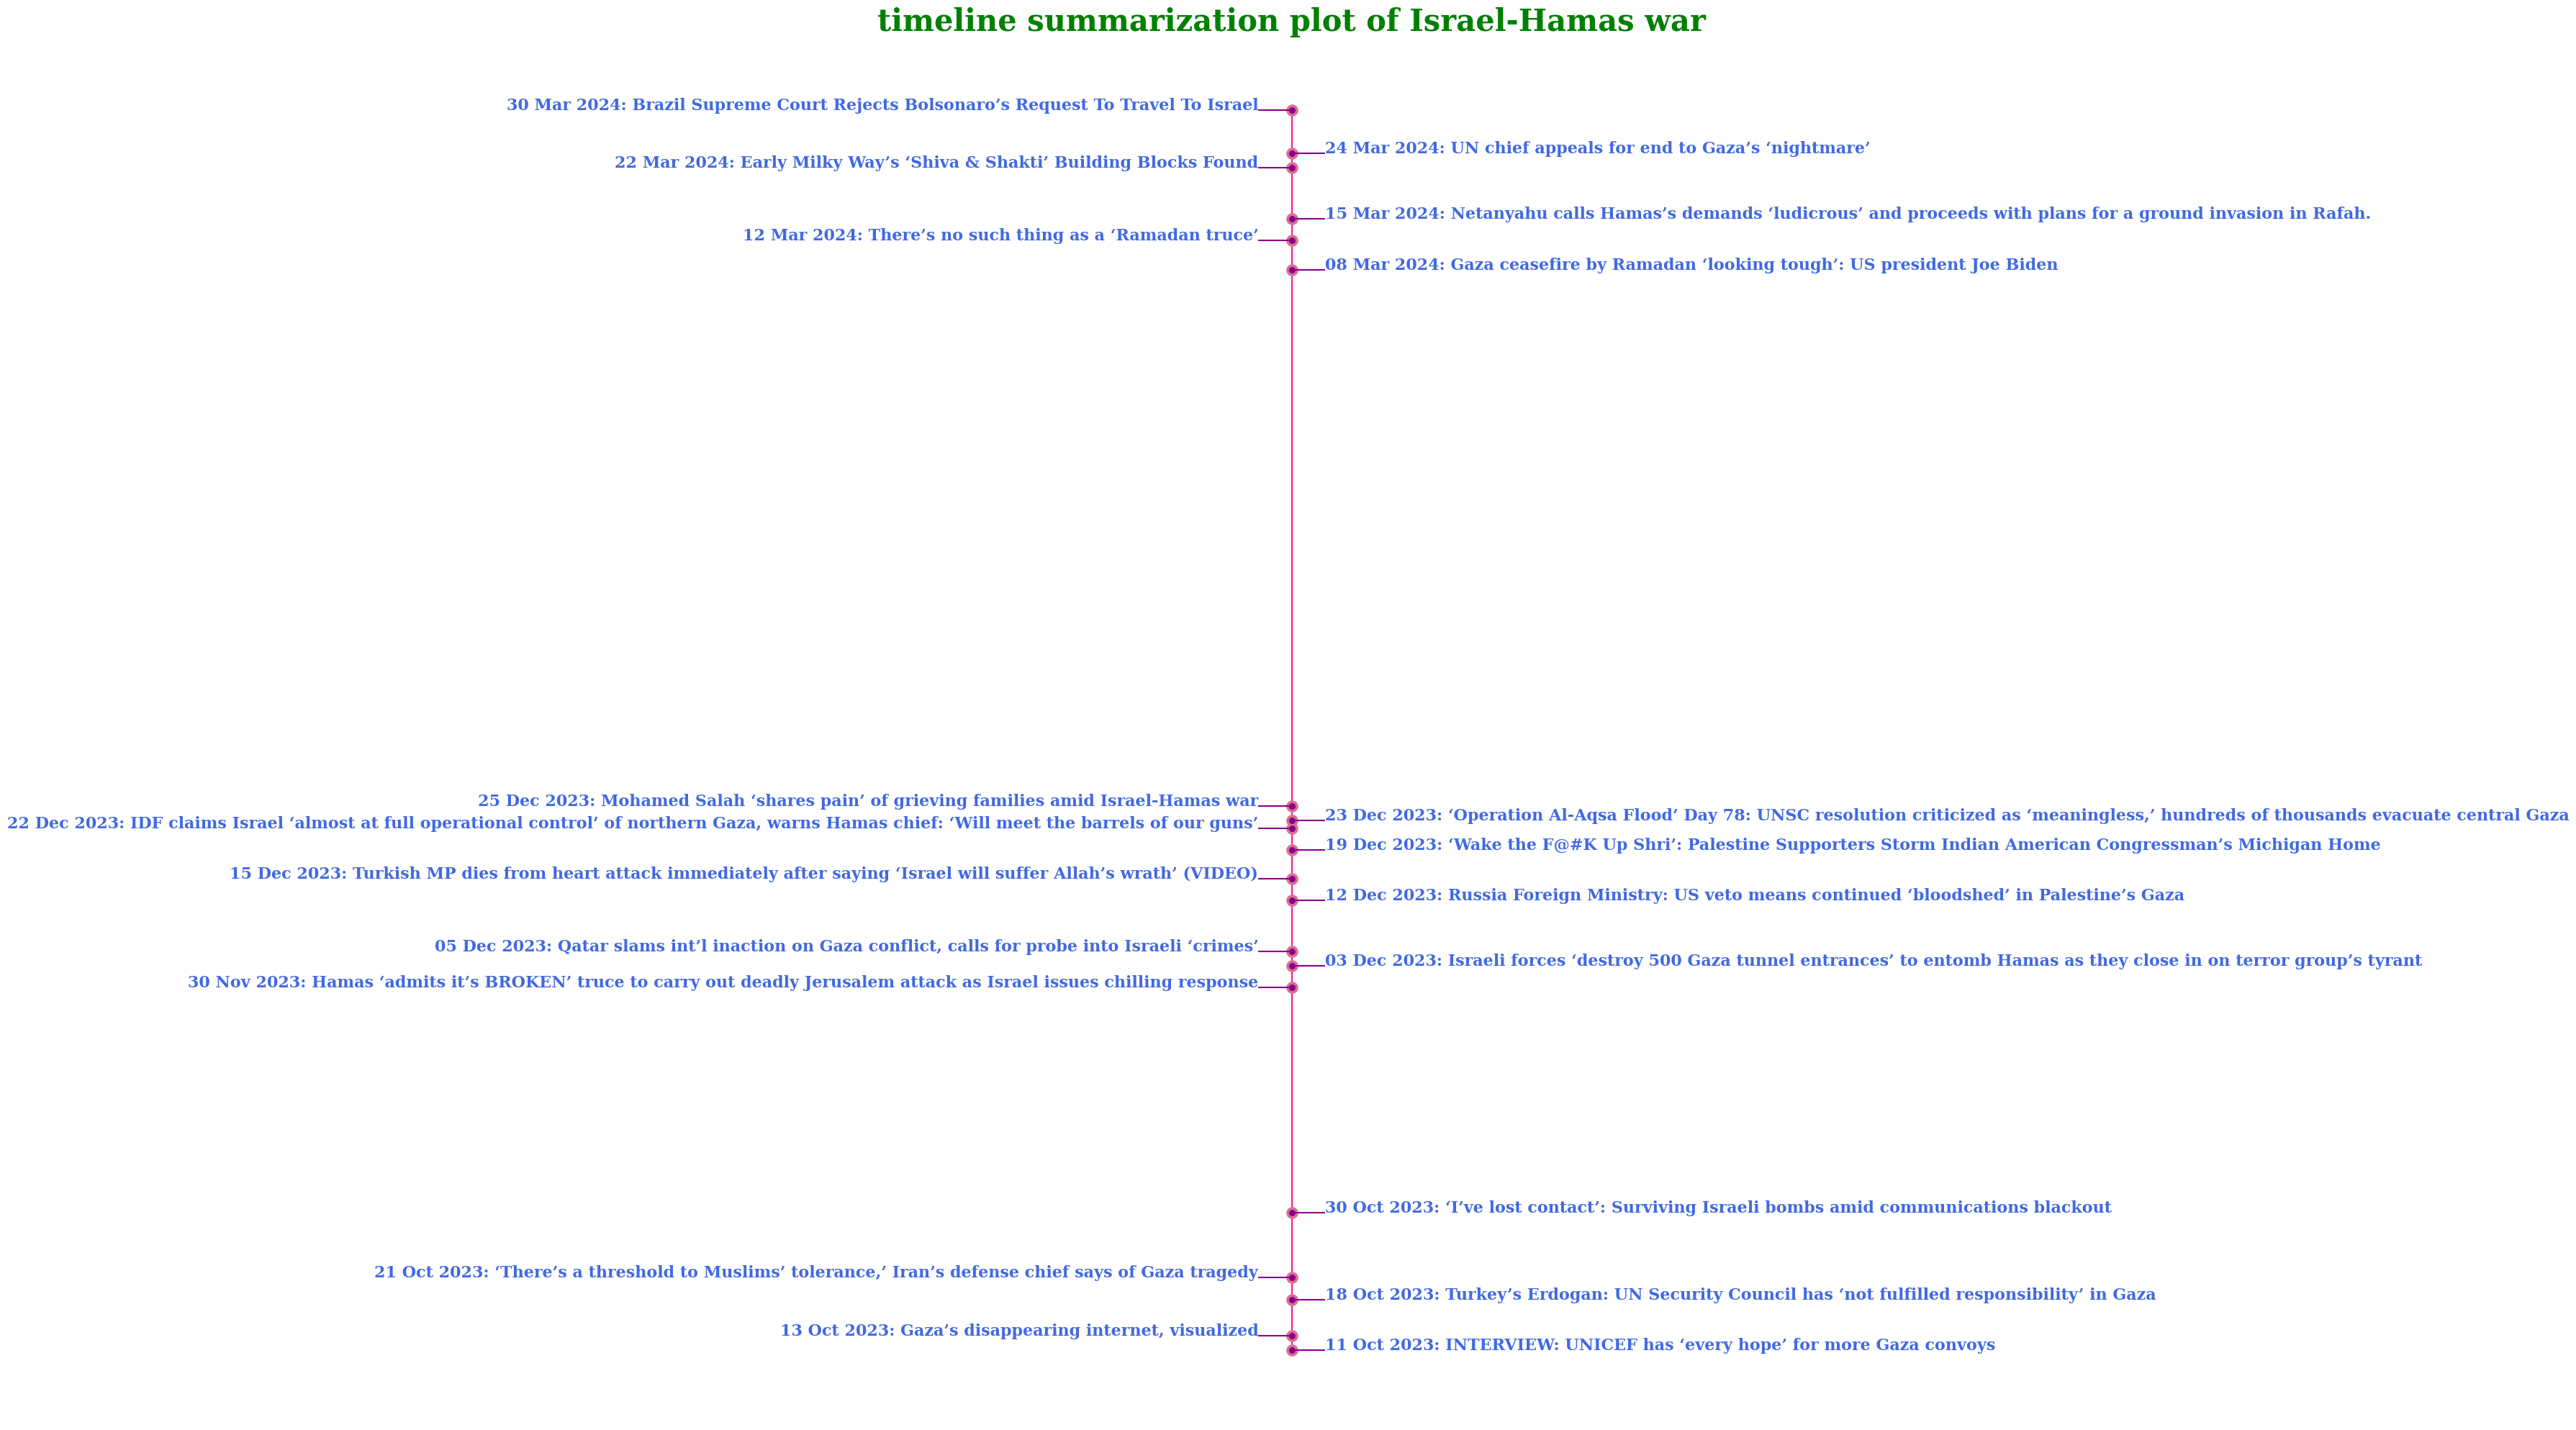

In [611]:
# Define min_date and max_date
min_date = final_df['date'].min() - timedelta(days=10)
max_date = final_df['date'].max() + timedelta(days=10)

# Plot
fig, ax = plt.subplots(figsize=(12, 25), constrained_layout=True)
ax.set_xlim(-20, 20)
ax.set_ylim(min_date, max_date)
ax.axvline(0, ymin=0.05, ymax=0.95, c='deeppink', zorder=1)

ax.scatter(np.zeros(len(final_df['date'])), final_df['date'], s=120, c='palevioletred', zorder=2)
ax.scatter(np.zeros(len(final_df['date'])), final_df['date'], s=30, c='darkmagenta', zorder=3)

label_offsets = np.repeat(2.0, len(final_df['date']))
label_offsets[1::2] = -2.0
for i, (l, d) in enumerate(zip(labels, final_df['date'])):
    d = d - timedelta(days=0)
    align = 'left' if i % 2 == 0 else 'right'
    ax.text(label_offsets[i], d, l, ha=align, fontfamily='serif', fontweight='bold', color='royalblue', fontsize=16)

stems = np.repeat(2.0, len(final_df['date']))
stems[1::2] *= -1.0
x = ax.hlines(final_df['date'], 0, stems, color='darkmagenta')

for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('timeline summarization plot of Israel-Hamas war', fontweight="bold", fontfamily='serif', fontsize=30, color='green')


#plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

# The End. Thanks.....!